In [1]:
import pandas as pd
import numpy as np

train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

train_df.head()


Train shape: (1460, 81)
Test shape: (1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
target  = "SalePrice"

x = train_df.drop(columns=[target])
y = train_df[target]

print('X shape: ',x.shape)
print('Y shape: ',y.shape)
print("Target min/mean/max:", y.min(),y.mean(),y.max())

X shape:  (1460, 80)
Y shape:  (1460,)
Target min/mean/max: 34900 180921.19589041095 755000


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
missing = train_df.isnull().sum()
missing = missing[missing >0].sort_values(ascending=False)
missing

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64

In [6]:
none_cols = [
    "PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu",
    "GarageType", "GarageFinish", "GarageQual", "GarageCond",
    "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2"
]


In [7]:
for col in none_cols:
    train_df[col] = train_df[col].fillna("None")

In [8]:
train_df[none_cols].isnull().sum()

PoolQC          0
MiscFeature     0
Alley           0
Fence           0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
dtype: int64

In [9]:
numeric_cols = train_df.select_dtypes(include=["int64","float64"]).columns
numeric_cols

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [12]:
for col in numeric_cols:
    train_df[col] = train_df[col].fillna(train_df[col].median())

In [15]:
train_df["Electrical"] = train_df["Electrical"].fillna(train_df["Electrical"].mode()[0])

In [17]:
train_df["MasVnrType"] = train_df["MasVnrType"].fillna("None")

In [18]:
train_df.isnull().sum().max()


np.int64(0)

In [19]:
categorical_cols = train_df.select_dtypes(include="object").columns
numeric_cols = train_df.select_dtypes(include=["int64", "float64"]).columns

print("Categorical:", len(categorical_cols))
print("Numeric:", len(numeric_cols))

Categorical: 43
Numeric: 38


In [25]:
X = train_df.drop("SalePrice", axis=1)
y = train_df["SalePrice"]

In [26]:
X_encoded = pd.get_dummies(x, drop_first=True)

In [27]:
X_encoded.shape

(1460, 260)

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

print(X_train.shape, X_test.shape)


(1168, 260) (292, 260)


In [29]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [30]:
y_pred = lr.predict(X_test)

In [31]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R2:", r2)

RMSE: 83010.70186866287
R2: 0.10163186824162118


In [32]:
y_log = np.log1p(y)

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train_log, y_test_log = train_test_split(
    X_encoded, y_log, test_size=0.2, random_state=42
)


In [34]:
from sklearn.linear_model import LinearRegression

lr_log = LinearRegression()
lr_log.fit(X_train, y_train_log)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [35]:
y_pred_log = lr_log.predict(X_test)

In [36]:
import numpy as np

y_pred = np.expm1(y_pred_log)   # log1p'nin tersi
y_test = np.expm1(y_test_log)

In [37]:
from sklearn.metrics import mean_squared_error, r2_score

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R2:", r2)


RMSE: 25455.232317972557
R2: 0.9155226472956516


In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_log, test_size=0.2, random_state=42
)


In [39]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV

alphas = [0.1, 1.0, 10.0, 50.0, 100.0, 200.0, 500.0]

ridge_pipe = Pipeline(steps=[
    ("scaler", StandardScaler(with_mean=False)),
    ("model", RidgeCV(alphas=alphas, cv=5))
])

ridge_pipe.fit(X_train, y_train)

print("Best Ridge alpha:", ridge_pipe.named_steps["model"].alpha_)


Best Ridge alpha: 500.0


In [40]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

y_pred_log = ridge_pipe.predict(X_test)

y_pred = np.expm1(y_pred_log)
y_true = np.expm1(y_test)

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
r2 = r2_score(y_true, y_pred)

print("Ridge RMSE:", rmse)
print("Ridge R2:", r2)


Ridge RMSE: 28293.586669359825
Ridge R2: 0.8956332462279794


In [41]:
from sklearn.linear_model import LassoCV

lasso_pipe = Pipeline(steps=[
    ("scaler", StandardScaler(with_mean=False)),
    ("model", LassoCV(alphas=None, cv=5, random_state=42, max_iter=20000))
])

lasso_pipe.fit(X_train, y_train)

print("Best Lasso alpha:", lasso_pipe.named_steps["model"].alpha_)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:1641: FutureWarning: 'alphas=None' is deprecated and will be removed in 1.9, at which point the default value will be set to 100. Set 'alphas=100' to silence this warning.
  warnings.warn(


Best Lasso alpha: 0.011076171824689689


In [42]:
y_pred_log = lasso_pipe.predict(X_test)

y_pred = np.expm1(y_pred_log)
y_true = np.expm1(y_test)

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
r2 = r2_score(y_true, y_pred)

print("Lasso RMSE:", rmse)
print("Lasso R2:", r2)


Lasso RMSE: 28898.110581716424
Lasso R2: 0.891125778404233


In [43]:
y_pred_log = lr_log.predict(X_test)

# Gerçek fiyatlara geri dön
import numpy as np
y_pred = np.expm1(y_pred_log)
y_true = np.expm1(y_test_log)


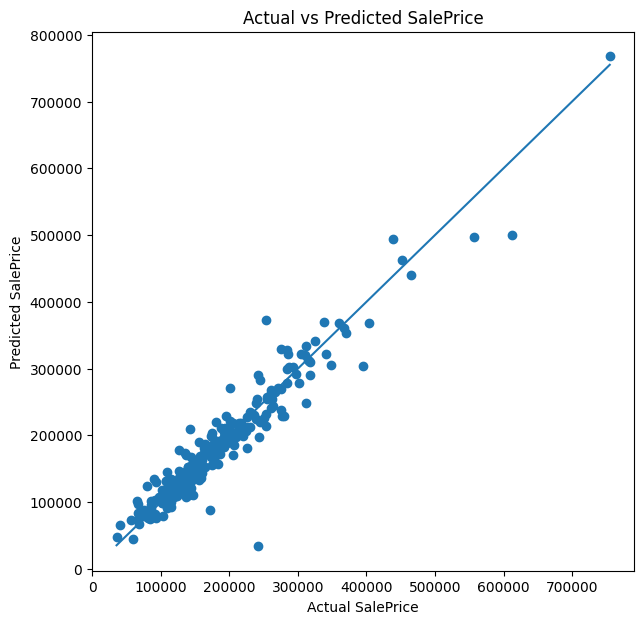

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,7))
plt.scatter(y_true, y_pred)
plt.plot([y_true.min(), y_true.max()],
         [y_true.min(), y_true.max()])

plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Actual vs Predicted SalePrice")
plt.show()


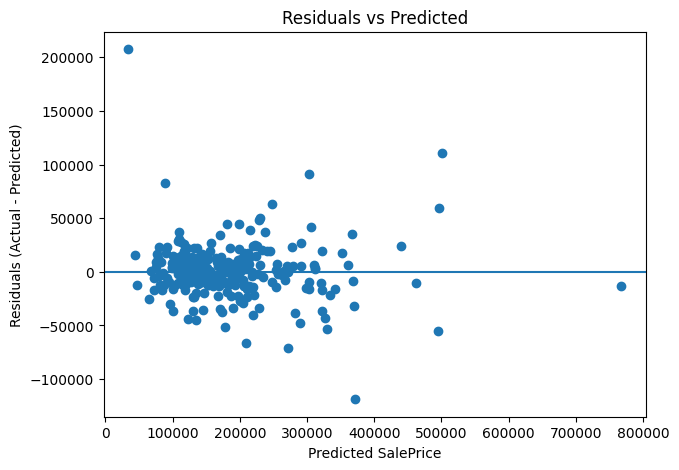

In [45]:
residuals = y_true - y_pred

plt.figure(figsize=(7,5))
plt.scatter(y_pred, residuals)
plt.axhline(0)

plt.xlabel("Predicted SalePrice")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residuals vs Predicted")
plt.show()


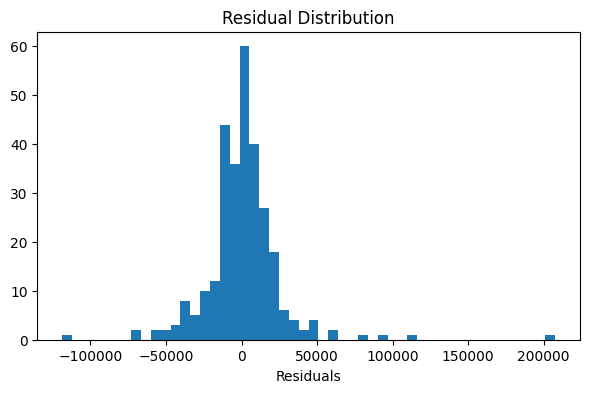

In [46]:
plt.figure(figsize=(7,4))
plt.hist(residuals, bins=50)
plt.xlabel("Residuals")
plt.title("Residual Distribution")
plt.show()
